<a href="https://colab.research.google.com/github/Garima-34/Stock-Market-Forecasting/blob/main/Amzn_h20_stockprice22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.2-py2.py3-none-any.whl size=265365378 sha256=80eb3907192b57adb9b1a69ab89a0a9d0cb850327296750332616f046b50f276
  Stored in directory: /root/.cache/pip/wheels/63/14/f4/9fff736a0df59884631031b604e7b000a70409f5b7adafc2c6
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [ ]:

# Initialize H2O cluster
h2o.init()

# Load the dataset from the CSV file
df = pd.read_csv("/content/AAPL.csv")


# Convert 'Date' column to DateTime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'] , format='%d-%m-%Y')
df.set_index('Date', inplace=True)

# Split the data into training and testing sets using Pandas indexing
a = len(df)
train = df.iloc[:int(0.9 * a)]
test = df.iloc[int(0.9 * a):]

# Define the target variable and features
target_column = 'Close'
y_train, X_train = train[target_column], train.drop(target_column, axis=1)
y_test, X_test = test[target_column], test.drop(target_column, axis=1)

# Convert Pandas DataFrame to H2O Frame
train_h2o = h2o.H2OFrame(train)
test_h2o = h2o.H2OFrame(test)

# Train the AutoML model
aml = H2OAutoML(max_runtime_secs=60)  # You can adjust the maximum runtime
aml.train(x=list(X_train.columns), y=target_column, training_frame=train_h2o)

# Get the leader model
leader = aml.leader

# Make predictions on the test data
y_predictions = leader.predict(test_h2o)
y_predictions = h2o.as_list(y_predictions)  # Convert H2O Frame to Pandas DataFrame

# Evaluate model performance
performance = leader.model_performance(test_h2o)

# Calculate the requested metrics
rmse = performance.rmse()
mae = performance.mae()
mse = performance.mse()
r2 = performance.r2()

# Print the performance metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

# Shutdown H2O cluster
h2o.cluster().shutdown()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 mins 05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.2
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_unknownUser_0uv4yu
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Root Mean Squared Error (RMSE): 3.5422476406754124
Mean Absolute Error (MAE): 1.6467105401504802
Mean Squared Error (MSE): 12.547518347870527
R-squared (R^2): 0.9593198073023017


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


H2O session _sid_a5d4 closed.


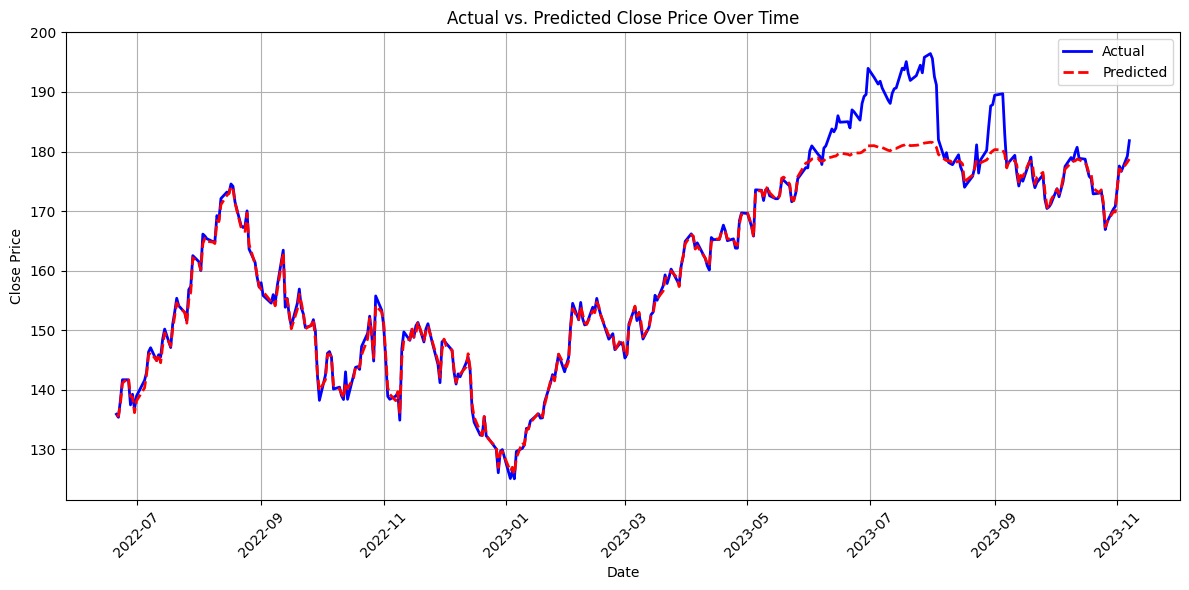

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' contains your original dataset and 'y_pred' contains the predicted values
X_test['Date'] = pd.to_datetime(X_test.index)  # Set the index as 'Date' if it's the DataFrame index

# Create a new figure
plt.figure(figsize=(12, 6))

# Plot the actual "close" values
plt.plot(X_test['Date'], y_test, label='Actual', color='blue', linewidth=2)

# Plot the predicted "close" values
plt.plot(X_test['Date'], y_predictions , label='Predicted', color='red', linestyle='--', linewidth=2)

# Set axis labels and a title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price Over Time')

# Add a legend
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.grid()
plt.tight_layout()
plt.show()
